In [1]:
import process_data
import learning 
import visuals as vs 
import pandas as pd

cancer_cells = pd.read_csv("cancer_cells.csv")
cancer_cells[['cycif.slide','cycif.core.id']] = cancer_cells['imageid'].apply(lambda x: pd.Series(str(x).split("_core")))

In [2]:
cancer_cells.head(5)

,Unnamed: 0,imageid,CellId,DNA1,BG488,BG555,BG647,DNA2,CD11c,CD207,...,MinorAxisLength,Eccentricity,Solidity,Perimeter,Roundness,X_position,Y_position,GlobalCellType,cycif.slide,cycif.core.id
0,7,TMA_18_810_core102,TMA_18_810_core102_c8,10016.488372,723.474806,260.424419,896.593023,5644.337209,824.790698,932.149225,...,17.059563,0.900642,0.953789,89.558,0.808446,1216.546512,504.474806,Cancer,TMA_18_810,102
1,13,TMA_18_810_core102,TMA_18_810_core102_c14,13044.239075,761.976864,292.323907,903.568123,7211.311054,794.804627,1051.686375,...,19.367217,0.678504,0.970075,72.976,0.917908,1163.683805,515.030848,Cancer,TMA_18_810,102
2,14,TMA_18_810_core102,TMA_18_810_core102_c15,16740.736842,747.642857,277.030075,904.007519,9668.131579,999.357143,1105.563910,...,18.840477,0.513167,0.886667,69.527,0.691488,1180.078947,511.800752,Cancer,TMA_18_810,102
3,17,TMA_18_810_core102,TMA_18_810_core102_c18,25669.754237,838.271186,282.203390,988.542373,14877.711864,1791.940678,1289.135593,...,10.307858,0.725268,0.983333,37.266,1.067742,1203.584746,517.194915,Cancer,TMA_18_810,102
4,18,TMA_18_810_core102,TMA_18_810_core102_c19,13581.484594,815.070028,271.591036,985.411765,7798.890756,1121.882353,1471.464986,...,17.905629,0.730045,0.946950,69.205,0.936706,1548.481793,517.268908,Cancer,TMA_18_810,102


In [3]:
# Load the text file into a pandas DataFrame
slides_explanations = pd.read_csv('All-slides_cycif2samples.txt', sep="	")
slides_explanations['cycif.core.id']=slides_explanations['cycif.core.id'].str.replace("core", "").astype(cancer_cells['cycif.core.id'].dtype)

In [4]:
# Merge the two data frames on the slide number and core id columns
dataset = pd.merge(cancer_cells, slides_explanations[["cycif.slide", "cycif.core.id","patient"]], on=["cycif.slide", "cycif.core.id"])

In [5]:
# Load patinets' clinical info file into a pandas DataFrame
patients_data = pd.read_csv('T-CycIF.csv')
patients_data.rename(columns = {'TnumberAVL':'patient'}, inplace = True)
# Merge the two data frames on patient column
final_dataset = pd.merge(dataset, patients_data[["patient","Molecular_profile", 'therapy_sequence']], on=["patient"])

In [6]:
final_dataset.head(5)

,Unnamed: 0,imageid,CellId,DNA1,BG488,BG555,BG647,DNA2,CD11c,CD207,...,Perimeter,Roundness,X_position,Y_position,GlobalCellType,cycif.slide,cycif.core.id,patient,Molecular_profile,therapy_sequence
0,14690,TMA_18_810_core105,TMA_18_810_core105_c17,1834.572222,442.916667,126.838889,971.866667,867.872222,449.377778,525.988889,...,46.586,1.042249,864.922222,1022.133333,Cancer,TMA_18_810,105,T12-07130,BRCAmut OR hypermethylation,NACT
1,14693,TMA_18_810_core105,TMA_18_810_core105_c20,2394.456000,709.376000,193.880000,1524.640000,1266.368000,612.384000,588.584000,...,37.390,1.123593,822.848000,1032.832000,Cancer,TMA_18_810,105,T12-07130,BRCAmut OR hypermethylation,NACT
2,14694,TMA_18_810_core105,TMA_18_810_core105_c21,1451.044693,391.966480,129.027933,923.972067,762.525140,415.731844,419.441341,...,49.746,0.908964,1241.653631,1037.324022,Cancer,TMA_18_810,105,T12-07130,BRCAmut OR hypermethylation,NACT
3,14695,TMA_18_810_core105,TMA_18_810_core105_c22,2534.700000,403.315000,145.510000,926.080000,1271.350000,404.415000,427.945000,...,47.860,1.097222,2032.160000,1034.225000,Cancer,TMA_18_810,105,T12-07130,BRCAmut OR hypermethylation,NACT
4,14696,TMA_18_810_core105,TMA_18_810_core105_c23,2961.963768,512.326087,157.384058,1087.275362,1416.318841,494.108696,607.768116,...,40.433,1.060760,864.398551,1035.210145,Cancer,TMA_18_810,105,T12-07130,BRCAmut OR hypermethylation,NACT


In [6]:
df = final_dataset[['cycif.slide','CD11c', 'CD207', 'GranzymeB', 'CD163', 'CD4', 'CD3d', 'CD8a', 'FOXP3', 'PD1', 'pTBK1', 'CD15', 'yH2AX', 'cPARP1', 'PDL1_488', 'Ki67', 'Vimentin', 'MHCII', 'CK7', 'MHCI', 'ECadherin', 'aSMA', 'CD31', 'Area', 'Eccentricity', 'Roundness', 'patient', 'Molecular_profile', 'therapy_sequence']]
# Drop all rows (axis index = 0)  with NaN values
df=df.dropna(axis=0)

# Transformed data
features = ['CD11c', 'CD207', 'GranzymeB', 'CD163', 'CD4', 'CD3d', 'CD8a', 'FOXP3', 'PD1', 'pTBK1', 'CD15', 'yH2AX', 'cPARP1', 'PDL1_488', 'Ki67', 'Vimentin', 'MHCII', 'CK7', 'MHCI', 'ECadherin', 'aSMA', 'CD31', 'Area', 'Eccentricity', 'Roundness']
log_df = process_data.transform_df('LOG2', df, features)

# Trim outliers if needed
trim_df = process_data.remove_outliers(log_df,features)

print(f"Shape of trimmed dataset: {trim_df.shape}")
# print(trim_df['therapy_sequence'].unique())
# print(trim_df['Molecular_profile'].unique())

# Scale the data
df = process_data.scaling('slide', 'Standard', trim_df, features)

Shape of trimmed dataset: (1309922, 29)


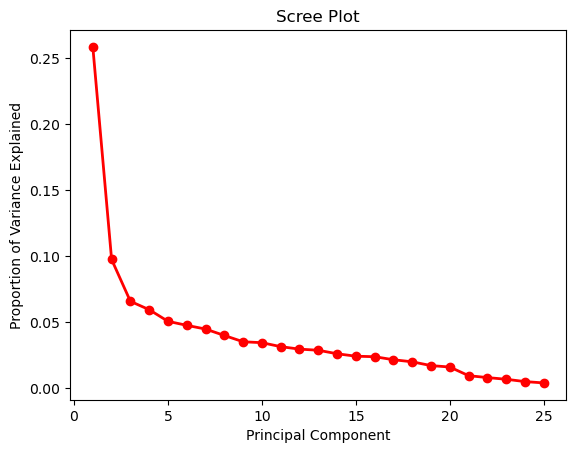

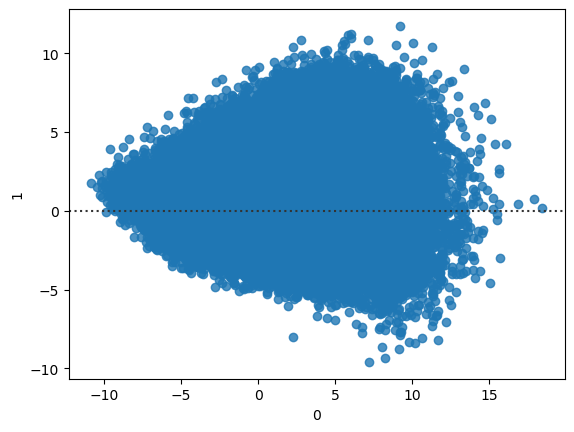

In [21]:
process_data.get_PCA(df,features,'Molecular_profile')

Top 3 features that drive the most variance within Component 1: aSMA, CD207, ECadherin. Variance explained: 0.9007
Top 3 features that drive the most variance within Component 2: MHCII, MHCI, ECadherin. Variance explained: 0.8968
Top 3 features that drive the most variance within Component 3: CD3d, MHCII, yH2AX. Variance explained: 0.7833


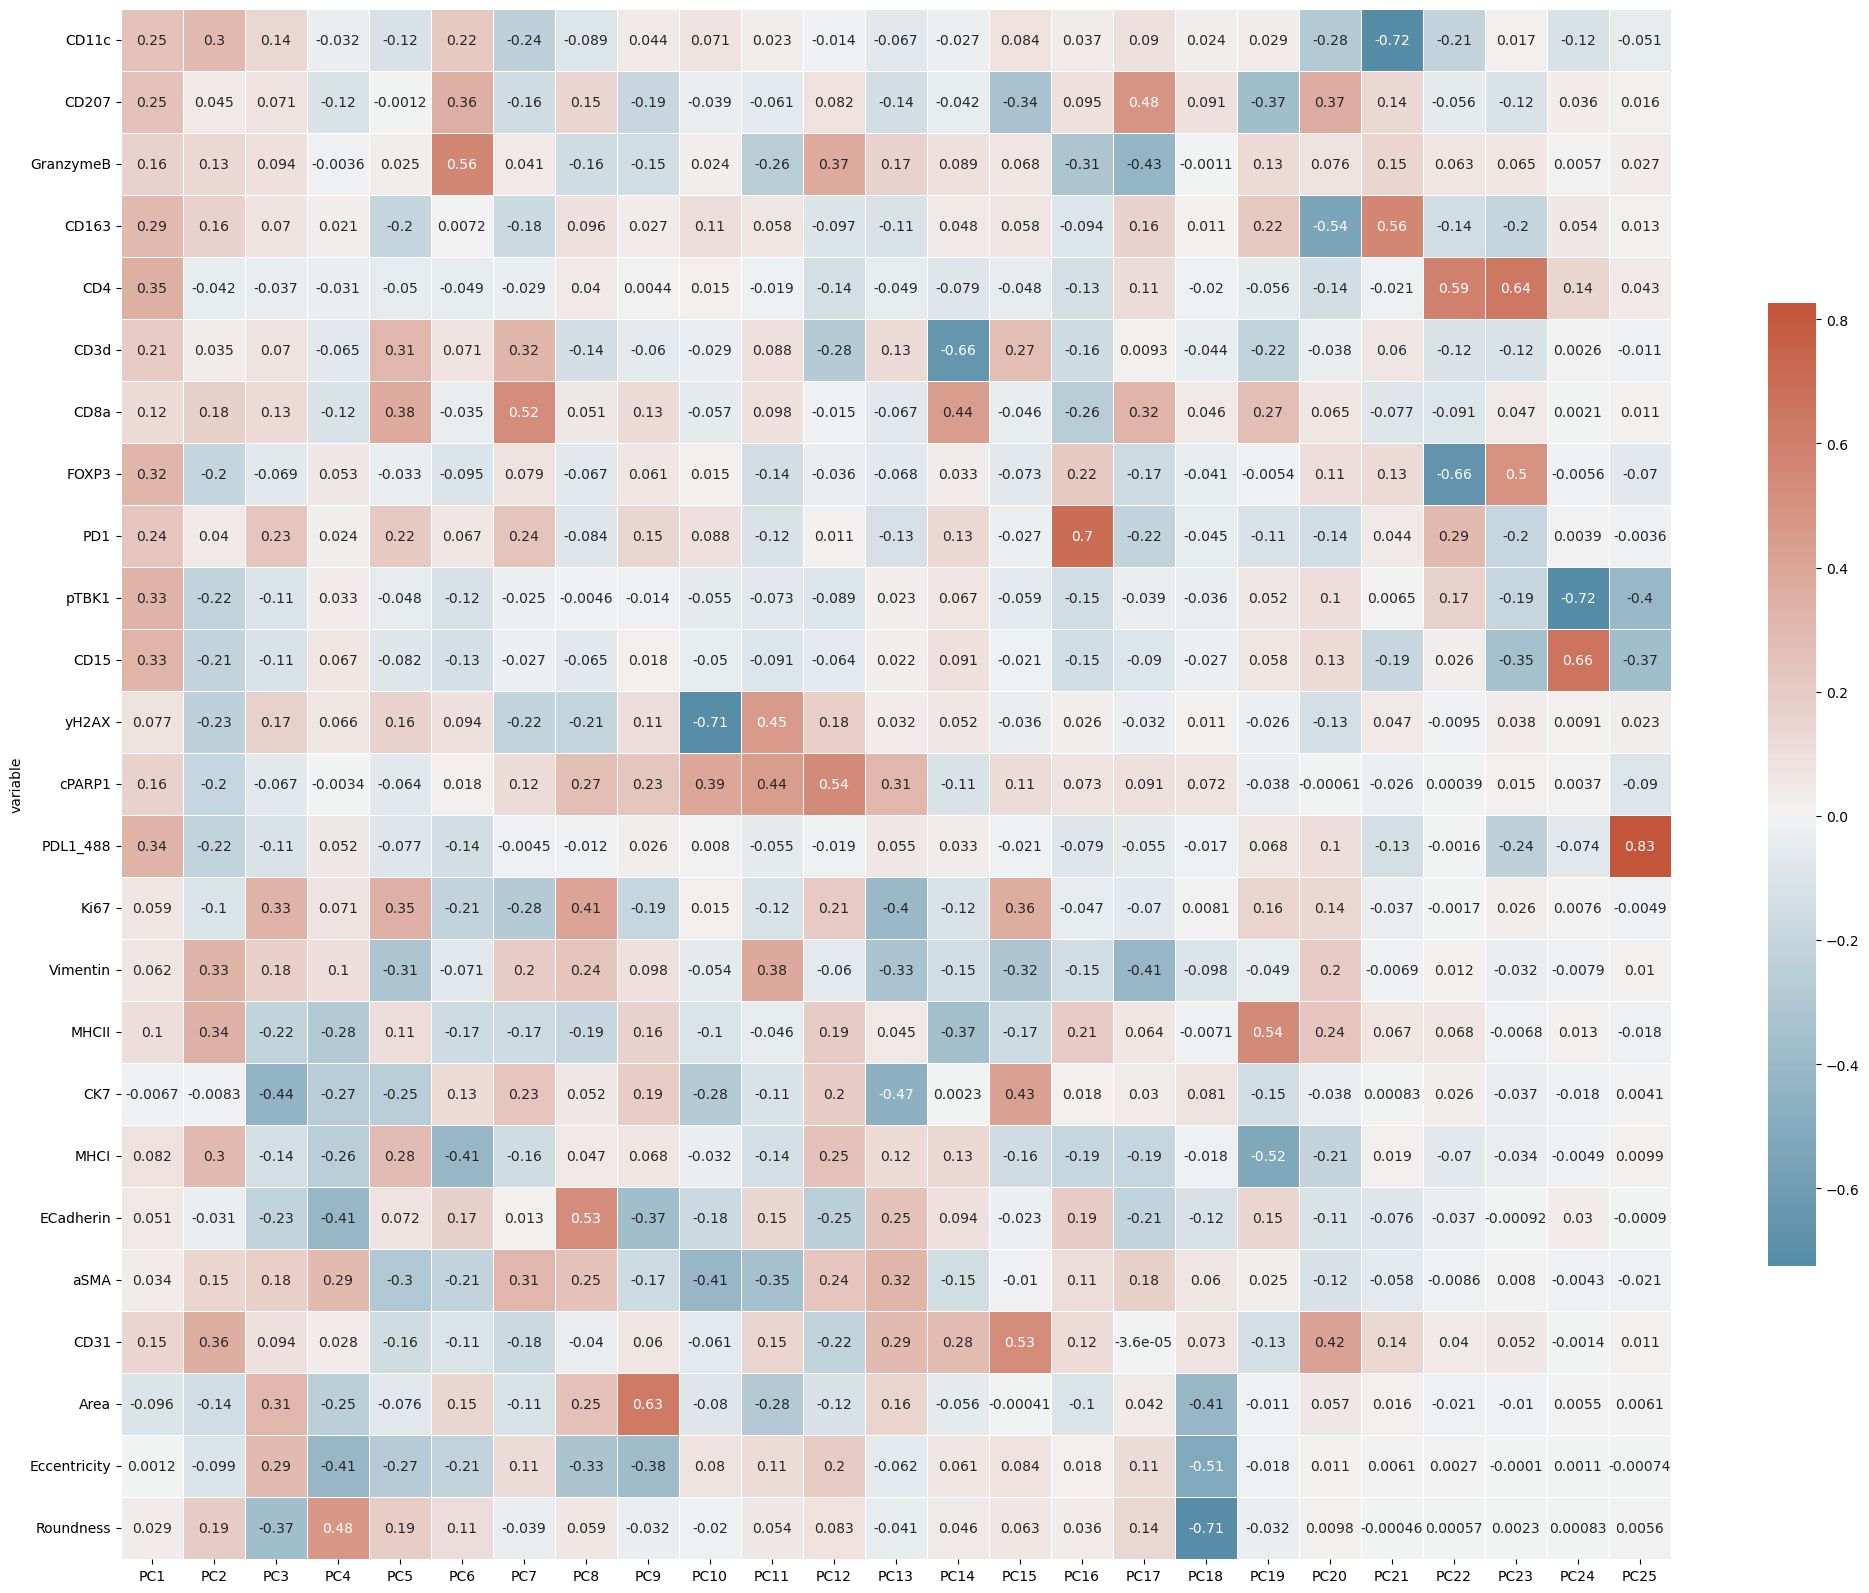

In [25]:
process_data.get_features_from_PCA(df[features], features, 3)

In [7]:
# Prepare categorical variables
categorical_variables = ['Molecular_profile', 'therapy_sequence']
learning.prepare_categorical_inputs(df,categorical_variables)

# Split dataset to training and testing sets 
X_train, y_train, X_test, y_test = learning.prep_train_test_data(df,'Molecular_profile', 'therapy_sequence','Molecular_profile', 5)

In [8]:
model = learning.find_DT_by_Baseian(X_train, y_train)

/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 165, in fit
    X,

params: {'max_depth': 8, 'min_samples_split': 846, 'min_samples_leaf': 859}, scores: [nan nan nan nan nan nan nan nan nan]


/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 165, in fit
    X,

params: {'max_depth': 9, 'min_samples_split': 627, 'min_samples_leaf': 391}, scores: [nan nan nan nan nan nan nan nan nan]


/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 165, in fit
    X,

params: {'max_depth': 6, 'min_samples_split': 66, 'min_samples_leaf': 280}, scores: [nan nan nan nan nan nan nan nan nan]


/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 165, in fit
    X,

params: {'max_depth': 7, 'min_samples_split': 814, 'min_samples_leaf': 485}, scores: [nan nan nan nan nan nan nan nan nan]


/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/alex/opt/anaconda3/envs/nki-env/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 165, in fit
    X,

params: {'max_depth': 7, 'min_samples_split': 838, 'min_samples_leaf': 344}, scores: [nan nan nan nan nan nan nan nan nan]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
results, X_train, X_test = learning.eliminate_features(model, X_train, y_train, X_test, y_test)